## Overall Structure 

1. Import Libraries 
2. Load Dataset 
3. Data Cleaning and Preparation: 
- A. Feature selection 
- B. Missing data handling 
- C. Duplicated data handling 
- D. Outlier handling for numerical data 
- E. Feature engineering for numerical data 
- F. Class consolidation for numerical data

## 1. Import Libraries

In [120]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for data exploration
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals

## 2. Load Dataset


In [121]:
# Load the dataset

credit_data = pd.read_csv("credit_train.csv")
credit_data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# General information about the dataset

print("\nGeneral Dataset Information:")
credit_data.info()


General Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since l

## 3. Data Preparation & Cleaning

In [123]:
# Select the first 20,000 rows of the dataset and assigns them back to the credit_data variable

credit_data = credit_data.iloc[:20000]
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       20000 non-null  object 
 1   Customer ID                   20000 non-null  object 
 2   Loan Status                   20000 non-null  object 
 3   Current Loan Amount           20000 non-null  float64
 4   Term                          20000 non-null  object 
 5   Credit Score                  16140 non-null  float64
 6   Annual Income                 16140 non-null  float64
 7   Years in current job          19136 non-null  object 
 8   Home Ownership                20000 non-null  object 
 9   Purpose                       20000 non-null  object 
 10  Monthly Debt                  20000 non-null  float64
 11  Years of Credit History       20000 non-null  float64
 12  Months since last delinquent  9272 non-null   float64
 13  N

### A. Feature selection

In [124]:
# Drop Loan ID and Customer ID which are irrelevant to analysis 
credit_data = credit_data.drop(columns=["Loan ID", "Customer ID"])

### B. Missing data handling

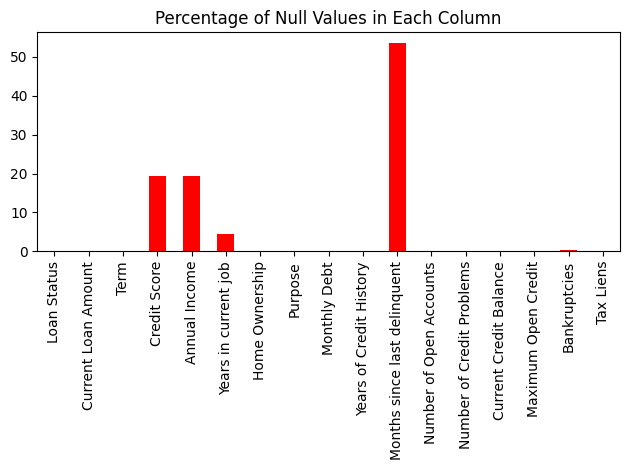

In [125]:
# Check percentage of missing (null) values in each column
null_percentages = credit_data.isnull().mean(axis=0) * 100

null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observations 
  - `Months since last delinquent` contains the highest proportion of missing values, approximately 53%. Given the substantial percentage, it is reasonable to drop this column entirely.
  - `Credit Score`, `Annual Income` and `Years in current job` have a relatively small amount of missing data (5-20%). These values dropped since dataset is sufficiently large.

In [126]:
# Ensure you're working on a proper copy to avoid SettingWithCopyWarning
credit_data = credit_data.iloc[:20000].copy()

# Drop column with >50% missing values
credit_data = credit_data.drop(columns=['Months since last delinquent'])

# Drop rows with missing values in key numeric columns
credit_data = credit_data.dropna(subset=['Credit Score', 'Annual Income', 'Years in current job', 'Bankruptcies', 'Tax Liens'])


In [127]:
# double check no more missing/null
credit_data.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

### C. Duplicated data handling

In [128]:
# Count the number of duplicate rows in the dataset
print("Number of duplicate rows in the dataset:")
print(credit_data.duplicated().sum())

Number of duplicate rows in the dataset:
390


In [129]:
# Drop duplicate rows
credit_data = credit_data.drop_duplicates()
print("Number of duplicate rows after dropping:")
print(credit_data.duplicated().sum())

Number of duplicate rows after dropping:
0


### D. Outliers handling (numerical data) 

In [130]:
# Check categorical and numerical columns

categorical_columns = credit_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = credit_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nCategorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
Numerical Columns: ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [131]:
# Initialize lists to store numerical and categorical column names
num_columns = []
cat_columns = []

for col in credit_data.columns:
    if credit_data[col].dtype == "float64":
        num_columns.append(col)
    else:
        cat_columns.append(col)

No. of IQR outliers in 'Current Loan Amount': 2162
Percentage of outliers: 14.40%
-----------------------------------------------------------------
No. of IQR outliers in 'Credit Score': 1430
Percentage of outliers: 9.53%
-----------------------------------------------------------------
No. of IQR outliers in 'Annual Income': 682
Percentage of outliers: 4.54%
-----------------------------------------------------------------
No. of IQR outliers in 'Monthly Debt': 511
Percentage of outliers: 3.40%
-----------------------------------------------------------------
No. of IQR outliers in 'Years of Credit History': 443
Percentage of outliers: 2.95%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Open Accounts': 365
Percentage of outliers: 2.43%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Credit Problems': 2124
Percentage of outliers: 14.15%
---------------------------------------------

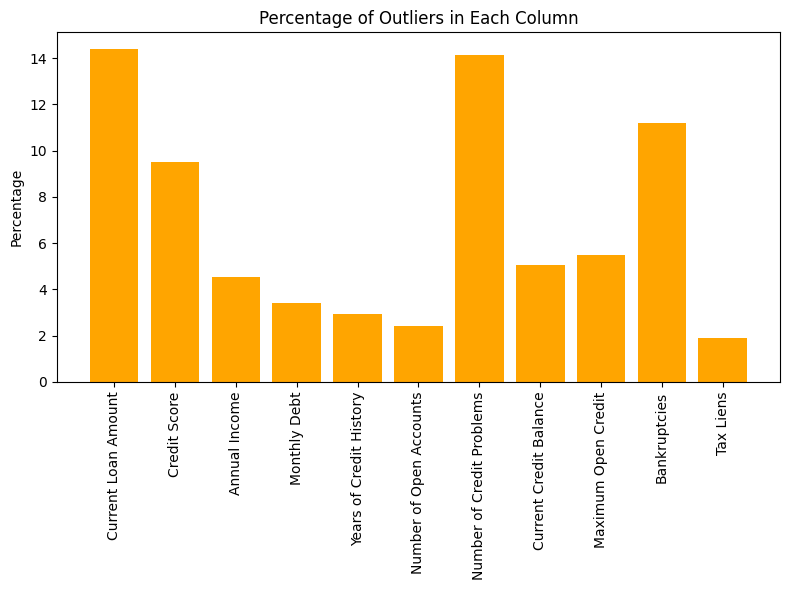

In [132]:
# Count outliers for each numerical column        
def visualize_outliers(data, num_columns, plot_type="both"):

    # Dictionary to store outlier information for each column
    outlier_data = {}
    for col in num_columns:
        data_column = data[col]

        # Calculate Q1, Q3, IQR and bounds for outliers 
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers based on the bounds
        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        outlier_counts = len(outliers)  # Count of outliers
        outlier_percentages = (outlier_counts / len(data_column)) * 100  # Percentage of outliers

        # Store the outlier data for the current column
        outlier_data[col] = {
            'count': outlier_counts,
            'percentage': outlier_percentages,
            'outliers': outliers.tolist()
        }

        # Print outliers 
        print(f"No. of IQR outliers in '{col}': {outlier_counts}")
        print(f"Percentage of outliers: {outlier_percentages:.2f}%")
        print("-----------------------------------------------------------------")

    # Visualization of outliers based on the specified plot type
    if plot_type == "counts":
        # Plot the number of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax.set_title('Number of Outliers in Each Column')
        ax.set_ylabel('Count')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "percentages":
        # Plot the percentage of outliers for each column
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax.set_title('Percentage of Outliers in Each Column')
        ax.set_ylabel('Percentage')
        ax.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    elif plot_type == "both":
        # Plot both the count and percentage of outliers side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot outlier counts
        ax1.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax1.set_title('Number of Outliers in Each Column')
        ax1.set_ylabel('Count')
        ax1.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax1.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        # Plot outlier percentages
        ax2.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax2.set_title('Percentage of Outliers in Each Column')
        ax2.set_ylabel('Percentage')
        ax2.set_xticks(list(outlier_data.keys()))  # Set x-axis ticks
        ax2.set_xticklabels(list(outlier_data.keys()), rotation=90)  # Rotate labels for readability

        plt.tight_layout()
        plt.show()

    else:
        # Handle invalid plot type
        print(f"Invalid plot_type: {plot_type}. Valid options are 'counts', 'percentages', or 'both'.")

    # Return the dictionary containing outlier information for further use
    return outlier_data

# Call the function to analyze and visualize outliers in numerical columns of the dataset
# Specify 'percentages' as the plot type to visualize the percentage of outliers in each column
outlier_results = visualize_outliers(credit_data, num_columns, plot_type="percentages")

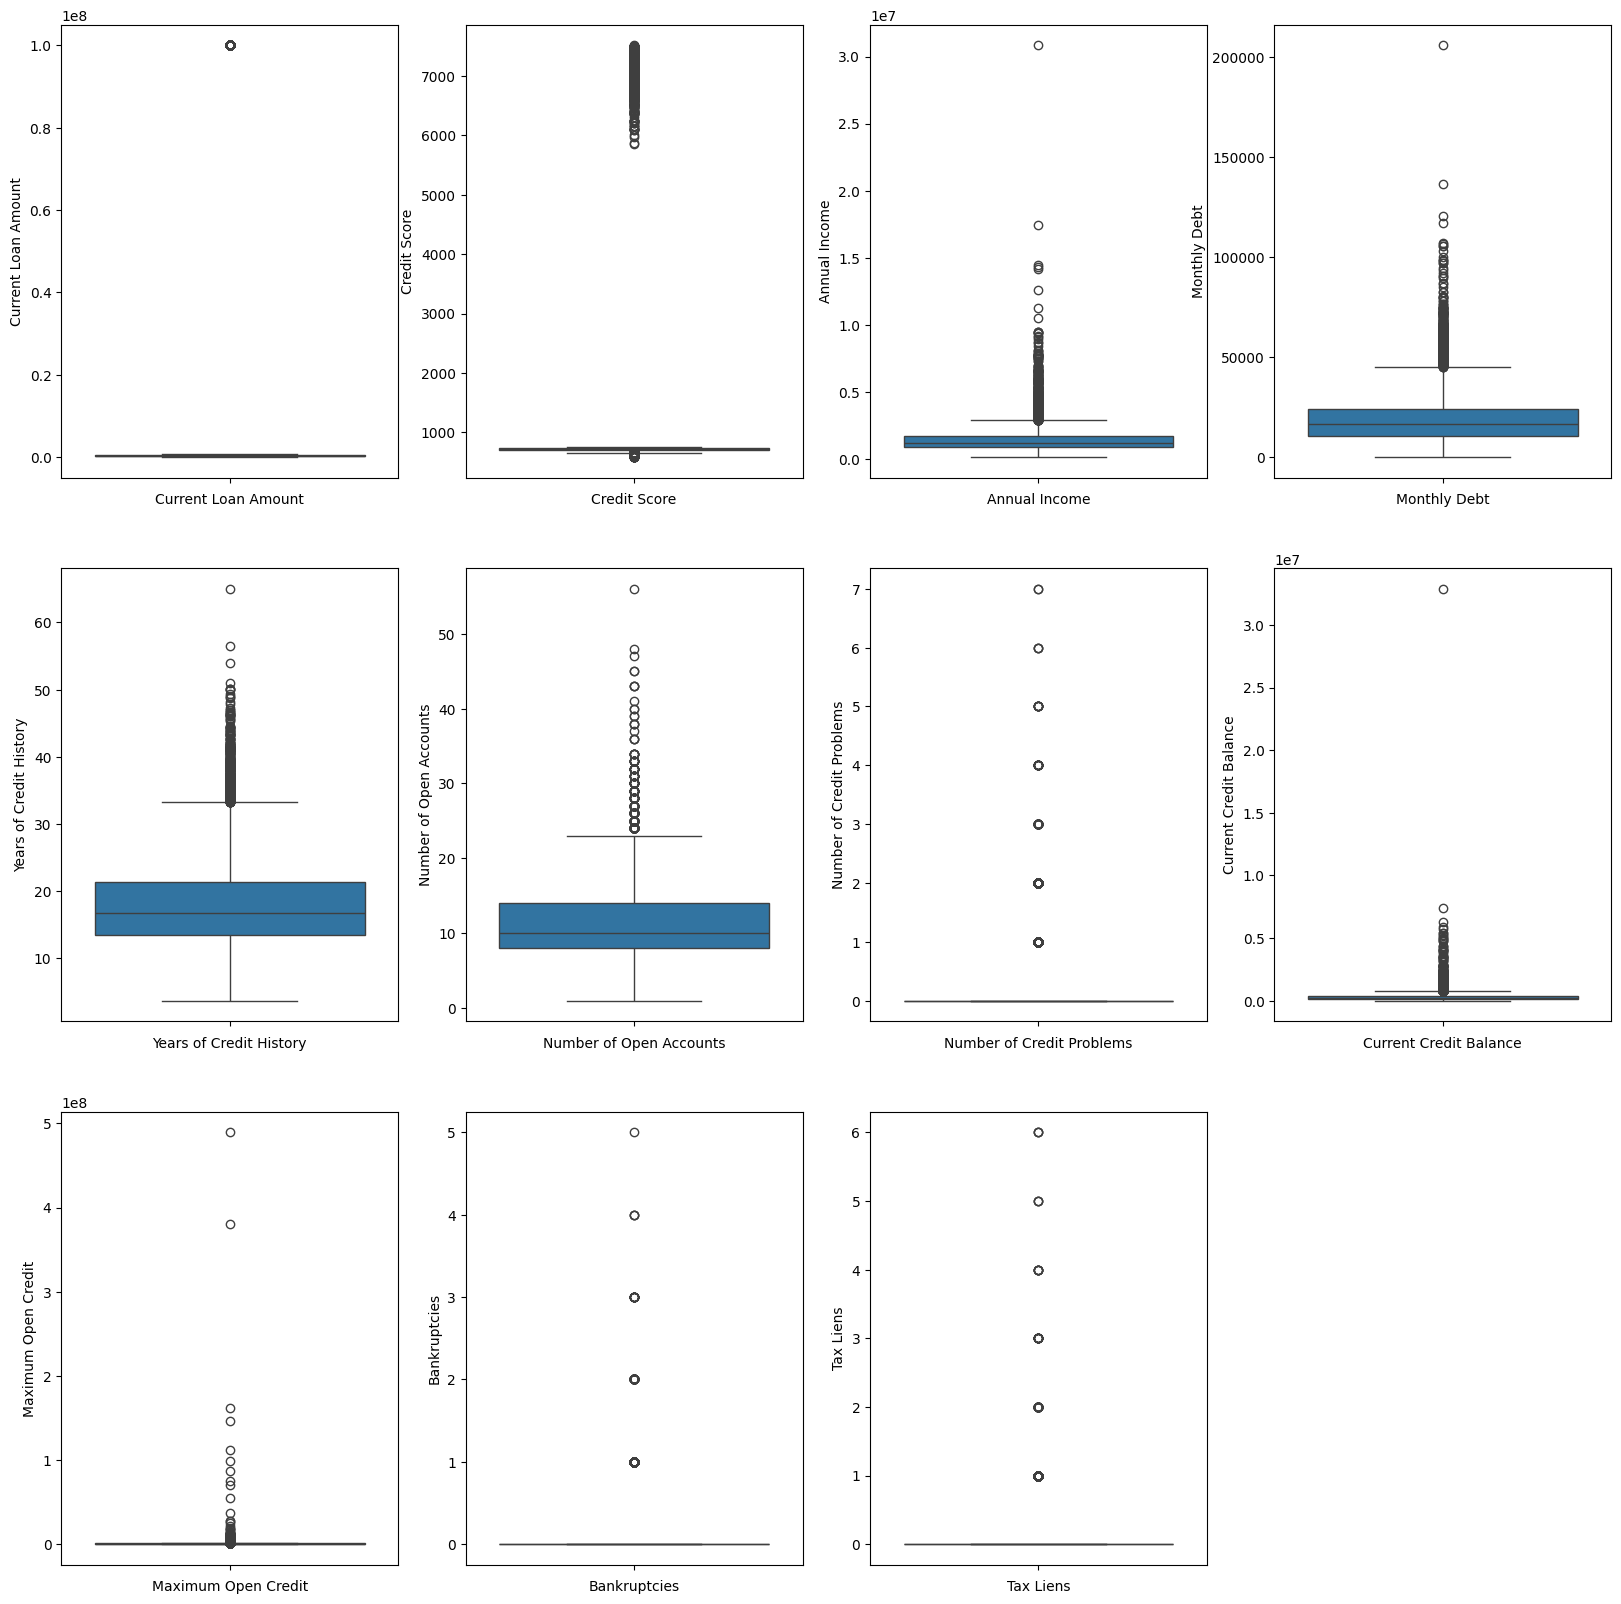

In [133]:
# Boxplot to visualise outliers
fig = plt.figure(figsize=(20,20))
counter = 0
for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1

#### Outlier Handling Strategy based on boxplot

For  `Annual Income`, `Monthly Debt`, `Current Credit Balance`, and `Maximum Open Credit`, these variables exhibit extreme right skew or visible outliers in boxplots, hence we can apply outlier **capping (winsorization)**. Specifically, we capped values at the 1st and 99th percentiles. 

For `Current Loan Amount` and `Credit Score`, we should **completely remove outlier rows** due to strong evidence of data quality issues:

- `Current Loan Amount`: Many outliers are exactly equal to 99,999,999 while the rest of the data was orders of magnitude smaller. This consistent high value suggests a placeholder or data entry error, and therefore those rows were removed.
  
- `Credit Score`: The typical credit score range is between 300 and 850, but we observed values in the 6000–7000 range, which likely indicates misformatted or corrupted entries. To maintain data integrity, these were also removed entirely.

For sparse features like `Bankruptcies`, `Tax Liens`, and `Number of Credit Problems`, we should not remove or cap outliers as these low-frequency values are meaningful indicators of financial risk. 

This balanced approach improves model generalization without losing essential information from the minority class or allowing poor-quality data to skew results.


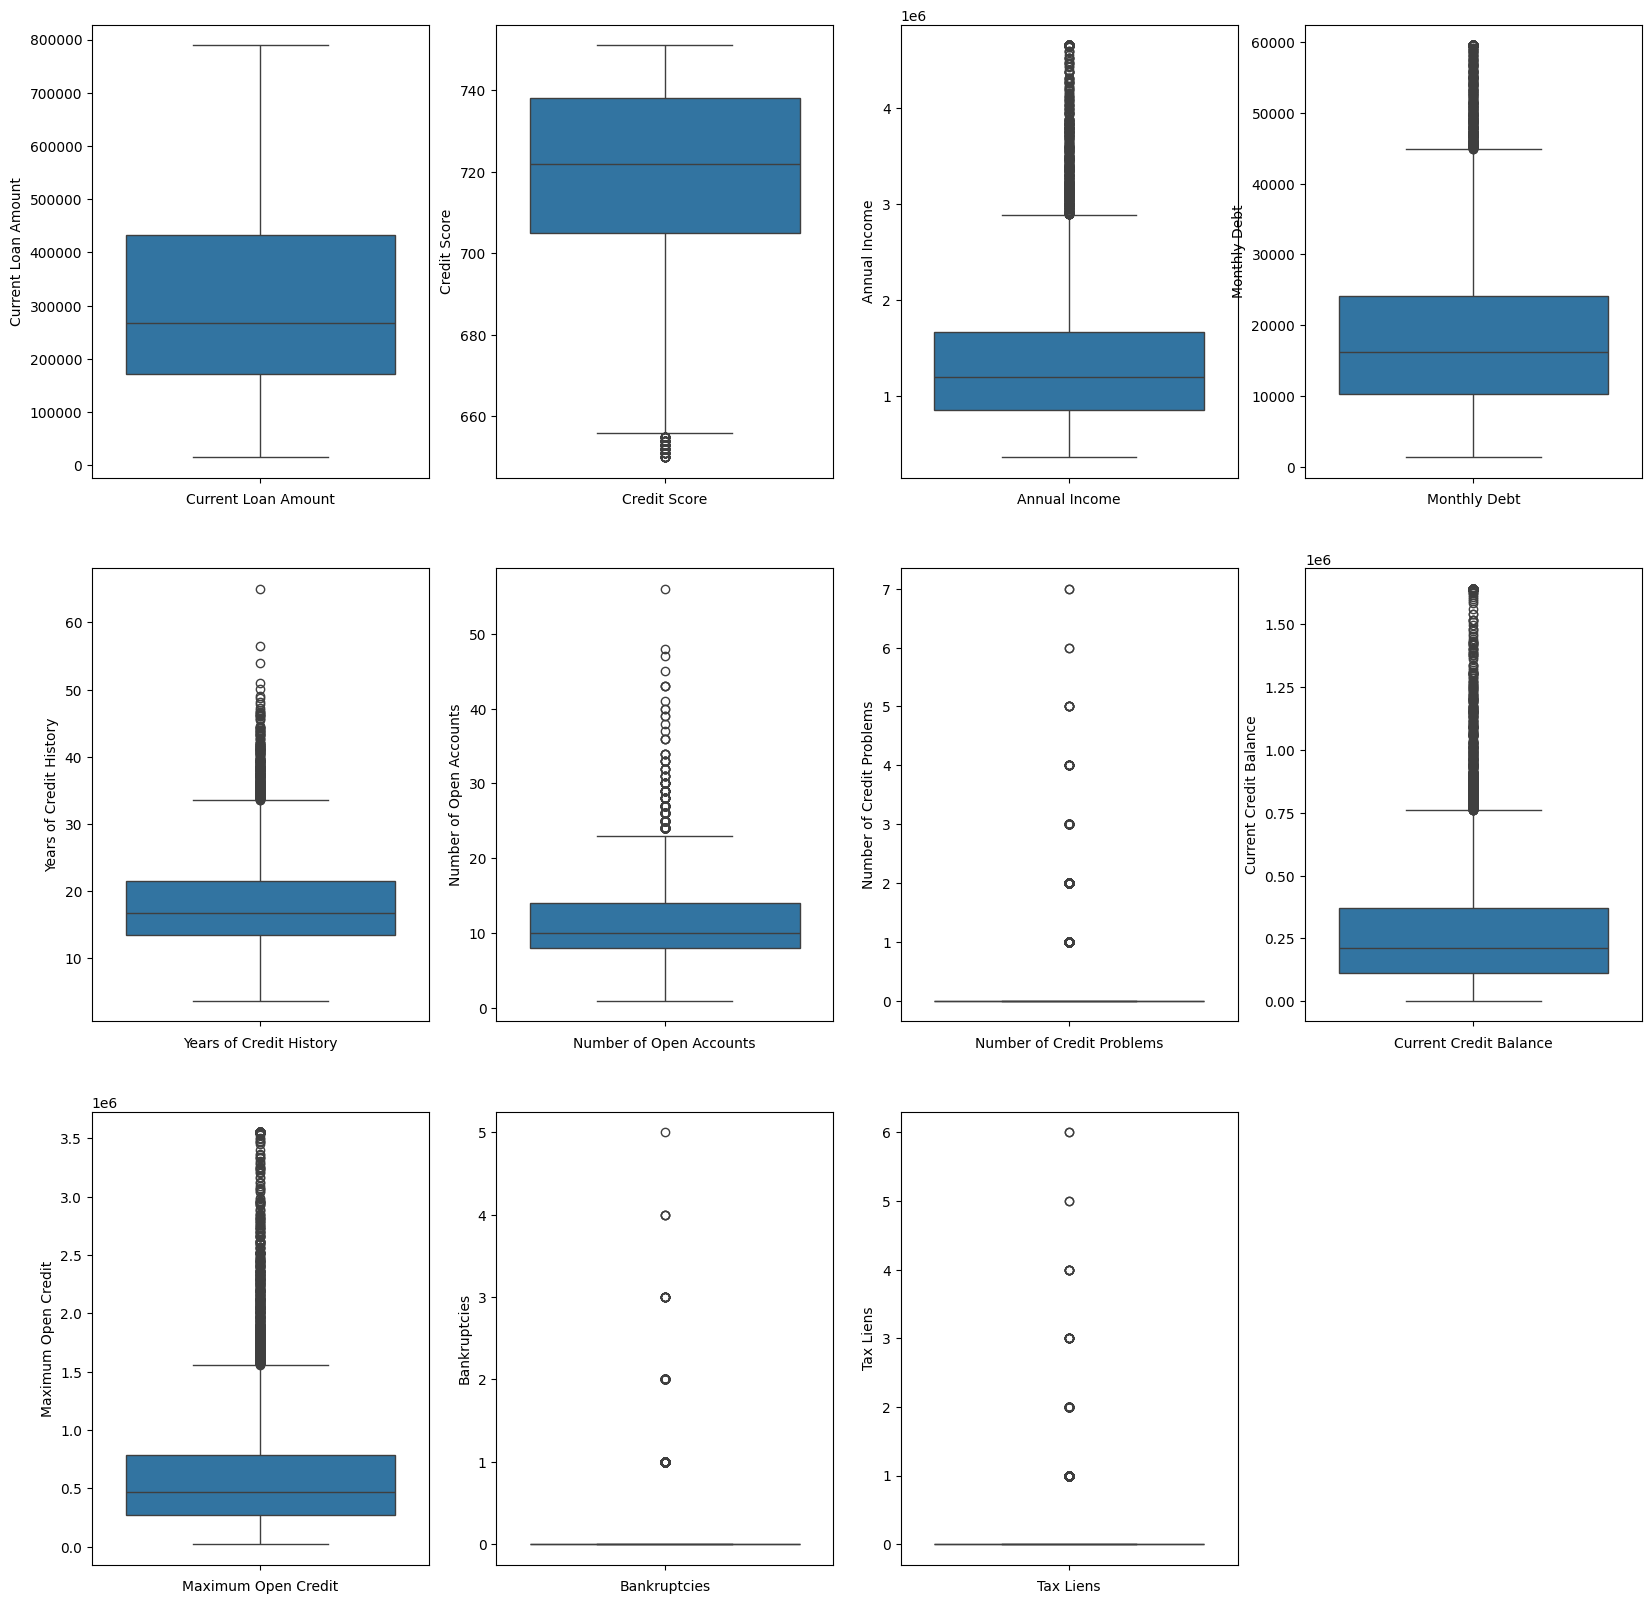

In [134]:
# Remove outliers for these features
features_to_remove_outliers = ['Current Loan Amount', 'Credit Score']

for col in features_to_remove_outliers:
    Q1 = credit_data[col].quantile(0.25)
    Q3 = credit_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    credit_data = credit_data[(credit_data[col] >= lower_bound) & (credit_data[col] <= upper_bound)]

# Cap outliers for these features
features_to_cap = ['Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']

for col in features_to_cap:
    lower = credit_data[col].quantile(0.01)
    upper = credit_data[col].quantile(0.99)
    credit_data[col] = np.clip(credit_data[col], lower, upper)

# Boxplots  
fig = plt.figure(figsize=(20,20))
counter = 0
for col in num_columns:
    sub = fig.add_subplot(3,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1

### E. Feature engineering (numerical data)

We create 2 additional features: Debt-to-Income Ratio and Credit Utilization Ratio, as they are strong predictors of financial risk

`Debt-to-Income Ratio` = `Monthly Debt`/`Monthly Income`

`Credit Utilization Ratio` = `Current Credit Balance` / `Maximum Open Credit`

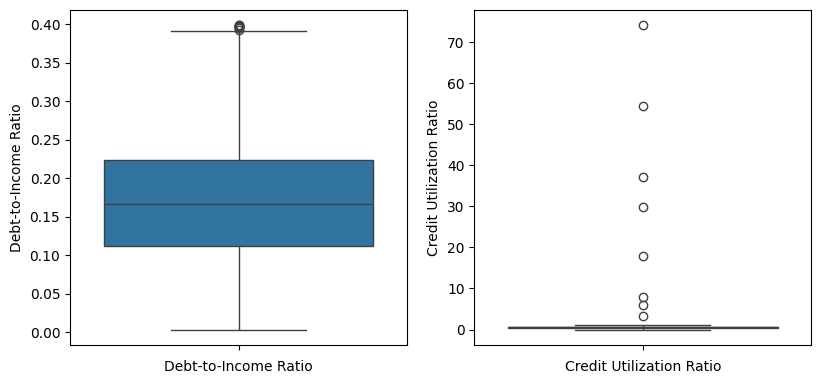

In [135]:
# Creating Debt-to-Income Ratio
credit_data['Monthly Income'] = credit_data['Annual Income'] / 12
credit_data['Debt-to-Income Ratio'] = credit_data['Monthly Debt'] / credit_data['Monthly Income']
num_columns.append('Debt-to-Income Ratio') 

# Creating Credit Utilization Ratio
credit_data['Credit Utilization Ratio'] = credit_data['Current Credit Balance'] / credit_data['Maximum Open Credit']
num_columns.append('Credit Utilization Ratio')

# Handling division by zero 
credit_data.replace([np.inf, -np.inf], np.nan, inplace=True)
credit_data.dropna(subset=['Debt-to-Income Ratio', 'Credit Utilization Ratio'], inplace=True)

# Boxplots to check distribution and outliers 
fig = plt.figure(figsize=(20,20))
counter = 0
for col in ['Debt-to-Income Ratio', 'Credit Utilization Ratio']:
    sub = fig.add_subplot(4,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1

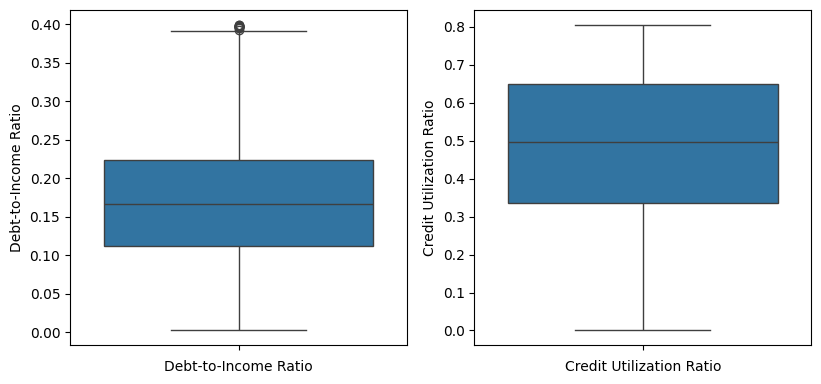

In [136]:
# Cap outliers for credit utilisation ratio 

credit_data['Credit Utilization Ratio'] = np.clip(
    credit_data['Credit Utilization Ratio'], 
    None, 
    credit_data['Credit Utilization Ratio'].quantile(0.95)
)

# Boxplots to check distribution and outliers 
fig = plt.figure(figsize=(20,20))
counter = 0
for col in ['Debt-to-Income Ratio', 'Credit Utilization Ratio']:
    sub = fig.add_subplot(4,4,counter+1)
    g = sns.boxplot(y=col, data=credit_data)
    plt.xlabel(col)
    counter = counter + 1

### E. Class consolidation (categorical data)

In [137]:
# Inspect categorical data
for col in cat_columns:
    # Print the column name and its unique values for inspection
    print(col + ": " + str(credit_data[col].unique()))
    print("-------------------------------------------------------------")

Loan Status: ['Fully Paid' 'Charged Off']
-------------------------------------------------------------
Term: ['Short Term' 'Long Term']
-------------------------------------------------------------
Years in current job: ['8 years' '3 years' '< 1 year' '2 years' '10+ years' '4 years' '5 years'
 '1 year' '7 years' '6 years' '9 years']
-------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
-------------------------------------------------------------
Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Take a Trip' 'Other' 'Business Loan' 'Buy a Car' 'small_business'
 'Medical Bills' 'vacation' 'Educational Expenses' 'wedding'
 'major_purchase' 'moving']
-------------------------------------------------------------


In [138]:
# Consolidate the Purpose column 
purpose_consolidation = {  
    'Home Improvements': 'Big Purchase',
    'Buy House': 'Big Purchase',
    'moving': 'Big Purchase',
    'Buy a Car': 'Big Purchase',
    'major_purchase': 'Big Purchase',
    'wedding': 'Big Purchase',

    'Debt Consolidation': 'Debt Consolidation',

    'Business Loan': 'Business Loan',
    'small_business': 'Business Loan',

    'Buy a Car': 'Essential Needs',
    'Medical Bills': 'Essential Needs',
    'Educational Expenses': 'Essential Needs',

    'vacation': 'Leisure',
    'Take a Trip': 'Leisure',

    'other': 'Other',
    'Other': 'Other',
    'renewable_energy' : 'Other'
}

credit_data['Purpose'] = credit_data['Purpose'].replace(purpose_consolidation)

In [139]:
# Standardize Home Ownership column
credit_data["Home Ownership"] = credit_data["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [140]:
# Standardise Years in Current Job column
credit_data["Years in current job"] = credit_data["Years in current job"].replace({"7 years":"7-9 years",
                                                                                 "8 years":"7-9 years",
                                                                                 "9 years":"7-9 years",
                                                                                 "4 years":"4-6 years",
                                                                                 "5 years":"4-6 years",
                                                                                 "6 years":"4-6 years",
                                                                                 "< 1 year":"0-1 year",
                                                                                 "1 year":"0-1 year",
                                                                                 "2 years":"2-3 years",
                                                                                 "3 years":"2-3 years"})

In [141]:
# Check cleaned data 
for col in cat_columns:
    # Print the column name and its unique values for inspection
    print(col + ": " + str(credit_data[col].unique()))
    print("-------------------------------------------------------------")

Loan Status: ['Fully Paid' 'Charged Off']
-------------------------------------------------------------
Term: ['Short Term' 'Long Term']
-------------------------------------------------------------
Years in current job: ['7-9 years' '2-3 years' '0-1 year' '10+ years' '4-6 years']
-------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent']
-------------------------------------------------------------
Purpose: ['Big Purchase' 'Debt Consolidation' 'Other' 'Leisure' 'Business Loan'
 'Essential Needs']
-------------------------------------------------------------


## 4. Save to CSV 

In [142]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11544 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                11544 non-null  object 
 1   Current Loan Amount        11544 non-null  float64
 2   Term                       11544 non-null  object 
 3   Credit Score               11544 non-null  float64
 4   Annual Income              11544 non-null  float64
 5   Years in current job       11544 non-null  object 
 6   Home Ownership             11544 non-null  object 
 7   Purpose                    11544 non-null  object 
 8   Monthly Debt               11544 non-null  float64
 9   Years of Credit History    11544 non-null  float64
 10  Number of Open Accounts    11544 non-null  float64
 11  Number of Credit Problems  11544 non-null  float64
 12  Current Credit Balance     11544 non-null  float64
 13  Maximum Open Credit        11544 non-null  float64


In [148]:
credit_data.to_csv('cleaned-dataset.csv')

# Below is to be moved into another file

### 6. Machine Learning

In [ ]:
#HELPER FUNCTION 

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    """
    Prints:
      - Confusion matrix
      - Precision/Recall/F1 for each class (0, 1, …)
      - Macro-average Precision/Recall/F1 (unweighted)
    """
    # 1) Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # 2) Per-class metrics
    labels = sorted(set(y_true))
    for lbl in labels:
        p = precision_score(y_true, y_pred, pos_label=lbl)
        r = recall_score(y_true, y_pred, pos_label=lbl)
        f = f1_score(y_true, y_pred, pos_label=lbl)
        print(f"\nClass {lbl} — Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}")

# Whatever u need to import

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier


In [ ]:
#XGBoost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# 1) Slice your data & split out X/y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3) Build the preprocessing + XGBoost pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

xgb_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    ))
])

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 5) Fit
xgb_pipeline.fit(X_train, y_train)

# 6) Predict & evaluate
y_pred = xgb_pipeline.predict(X_test)
evaluate_model(y_test, y_pred)


Confusion Matrix:
[[ 190  470]
 [   9 2334]]

Class 0 — Precision: 0.9548, Recall: 0.2879, F1: 0.4424

Class 1 — Precision: 0.8324, Recall: 0.9962, F1: 0.9069


In [ ]:
#XGBoost + SMOTE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4) Build preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 5) SMOTE + XGBoost pipeline
xgb_smote_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),  # 1:1 oversampling
    ('xgb', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

# 6) Fit and evaluate
xgb_smote_pipe.fit(X_train, y_train)
y_pred = xgb_smote_pipe.predict(X_test)

evaluate_model(y_test, y_pred)


Confusion Matrix:
[[ 262  388]
 [ 218 2135]]

Class 0 — Precision: 0.5458, Recall: 0.4031, F1: 0.4637

Class 1 — Precision: 0.8462, Recall: 0.9074, F1: 0.8757


In [ ]:
#Setting recall threshold for class 0 to 80%

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, recall_score

# 1) Prepare X/y and encode target
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']
le = LabelEncoder()
y = le.fit_transform(y)

# 2) Split into train_full/test, then train/val (val only for calibration)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1,
    random_state=42, stratify=y_train_full
)

# 3) Compute imbalance ratio
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# 4) Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 5) Hyperparameter search pipeline
search_pipe = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBClassifier(
        # use_label_encoder removed
        eval_metric='logloss',
        random_state=42
    ))
])
param_dist = {
    'xgb__n_estimators':      [100, 200, 300],
    'xgb__learning_rate':     [0.01, 0.05, 0.1],
    'xgb__max_depth':         [4, 6, 8],
    'xgb__subsample':         [0.6, 0.8, 1.0],
    'xgb__colsample_bytree':  [0.6, 0.8, 1.0],
    'xgb__gamma':             [0, 1, 5],
    'xgb__scale_pos_weight':  [ratio]
}
rs = RandomizedSearchCV(
    search_pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rs.fit(X_train, y_train)
best = rs.best_params_
print("Best hyperparams:", best)

# 6) Build final XGB (no early stopping)
xgb_final = XGBClassifier(
    n_estimators=1000,
    learning_rate=best['xgb__learning_rate'],
    max_depth=best['xgb__max_depth'],
    subsample=best['xgb__subsample'],
    colsample_bytree=best['xgb__colsample_bytree'],
    gamma=best['xgb__gamma'],
    scale_pos_weight=ratio,
    # use_label_encoder removed
    eval_metric='logloss',
    random_state=42
)

# Preprocess once
X_tr = preprocessor.fit_transform(X_train)
X_va = preprocessor.transform(X_val)
X_te = preprocessor.transform(X_test)

# Train on all of X_tr
xgb_final.fit(X_tr, y_train)

# 7) Calibrate on the val set
calib = CalibratedClassifierCV(xgb_final, cv='prefit', method='isotonic')
calib.fit(X_va, y_val)

# 8) Pick threshold for ≥80% recall on class 0
probs = calib.predict_proba(X_te)[:, 1]
best_thr = None
for thr in np.linspace(0, 1, 101):
    preds = (probs >= thr).astype(int)
    rec0 = recall_score(y_test, preds, pos_label=0)
    if rec0 >= 0.80:
        best_thr = thr
        break

if best_thr is None:
    print("No threshold achieves 80% recall on class 0 in [0,1].")
else:
    print(f"Threshold for ≥80% class 0 recall: {best_thr:.3f} (Recall_0={rec0:.3f})")

    # 9) Final evaluation at that threshold
    y_pred = (probs >= best_thr).astype(int)
    evaluate_model(y_test, y_pred)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparams: {'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 0.276452527161077, 'xgb__n_estimators': 200, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.05, 'xgb__gamma': 1, 'xgb__colsample_bytree': 0.8}
Threshold for ≥80% class 0 recall: 0.800 (Recall_0=0.806)
Confusion Matrix:
[[ 524  126]
 [1139 1214]]

Class 0 — Precision: 0.3151, Recall: 0.8062, F1: 0.4531

Class 1 — Precision: 0.9060, Recall: 0.5159, F1: 0.6575


#### This model is much better since we are prioritising catching defaulters. The downside is we are misclassifying 48% "fully paid" under "charged off" which is alot of false alarms

In [ ]:
# random forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target labels to 0/1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3) Build preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Assemble pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=100,          # number of trees
        max_depth=None,            # nodes are expanded until all leaves are pure
        class_weight='balanced',   # handle class imbalance automatically
        random_state=42
    ))
])

# 5) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 6) Fit and evaluate
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

evaluate_model(y_test, y_pred)


Confusion Matrix:
[[ 183  467]
 [   5 2348]]

Class 0 — Precision: 0.9734, Recall: 0.2815, F1: 0.4368

Class 1 — Precision: 0.8341, Recall: 0.9979, F1: 0.9087


In [ ]:

#random forest + smote
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 3) Build the preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Assemble SMOTE + Random Forest pipeline
rf_smote_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),  # balance classes 1:1
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    ))
])

# 5) Fit the pipeline and evaluate
rf_smote_pipe.fit(X_train, y_train)
y_pred = rf_smote_pipe.predict(X_test)

evaluate_model(y_test, y_pred)


Confusion Matrix:
[[ 270  380]
 [ 246 2107]]

Class 0 — Precision: 0.5233, Recall: 0.4154, F1: 0.4631

Class 1 — Precision: 0.8472, Recall: 0.8955, F1: 0.8707


In [ ]:
# knn 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# 1) Prepare X/y
X = credit_data[numerical_columns + categorical_columns]
y = LabelEncoder().fit_transform(credit_data['Loan Status'])

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Build a pipeline with KNN
knn_pipe = Pipeline([
    ('preproc', preprocessor),
    ('knn', KNeighborsClassifier())
])

# 5) Hyperparameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 6) Fit & select best
grid.fit(X_train, y_train)
print("Best KNN params:", grid.best_params_)

best_knn = grid.best_estimator_

# 7) Predict & evaluate
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNN params: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Confusion Matrix:
[[ 195  455]
 [  37 2316]]

Class 0 — Precision: 0.8405, Recall: 0.3000, F1: 0.4422

Class 1 — Precision: 0.8358, Recall: 0.9843, F1: 0.9040


#### KNN is very sensitive to class imbalance so we adopt SMOTE

In [ ]:
# knn + SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

# build an imbalanced‐learn pipeline
imb_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [5, 11, 17],
    'knn__weights':      ['uniform','distance'],
    'knn__p':            [1,2]       # try Manhattan vs Euclidean
}

grid = GridSearchCV(
    imb_pipe,
    param_grid,
    cv=5,
    scoring='recall',        # by default this is recall of the POS label=1
    n_jobs=-1, 
    verbose=1
)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'knn__n_neighbors': 17, 'knn__p': 1, 'knn__weights': 'uniform'}
Confusion Matrix:
[[ 257  393]
 [ 244 2109]]

Class 0 — Precision: 0.5130, Recall: 0.3954, F1: 0.4466

Class 1 — Precision: 0.8429, Recall: 0.8963, F1: 0.8688


#### We try optimizing for class 0 recall directly

In [ ]:
from sklearn.metrics import make_scorer, recall_score

recall_0 = make_scorer(recall_score, pos_label=0)

grid = GridSearchCV(
    imb_pipe,
    param_grid,
    cv=5,
    scoring=recall_0,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)
best_knn = grid.best_estimator_
print("Best for class 0 recall:", grid.best_params_)
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best for class 0 recall: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}
Confusion Matrix:
[[ 310  340]
 [ 412 1941]]

Class 0 — Precision: 0.4294, Recall: 0.4769, F1: 0.4519

Class 1 — Precision: 0.8509, Recall: 0.8249, F1: 0.8377


In [ ]:

# knn + all other adjustments

from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# 1) scorer that optimizes recall on the charged-off class (label=0)
recall_0 = make_scorer(recall_score, pos_label=0)

# 2) build pipeline: scale & encode → PCA → SMOTETomek → KNN
knn_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('pca', PCA(n_components=10)),                   # reduce to 10 dims
    ('resample', SMOTETomek(sampling_strategy=0.5,   # 50/50 in train folds
                             random_state=42)),
    ('knn', KNeighborsClassifier())
])

# 3) hyperparameter grid for KNN
param_grid = {
    'knn__n_neighbors': [5, 11, 17],
    'knn__weights':      ['uniform', 'distance'],
    'knn__p':            [1, 2]
}

# 4) grid search optimizing class‑0 recall
grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    cv=5,
    scoring=recall_0,
    n_jobs=-1,
    verbose=1
)

# 5) fit & select best
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_

# 6) predict on the real-world (imbalanced) test set
y_pred = best_knn.predict(X_test)

# 7) evaluate with your helper
evaluate_model(y_test, y_pred)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
Confusion Matrix:
[[2634  617]
 [  55 2886]]

Class 0 — Precision: 0.9795, Recall: 0.8102, F1: 0.8869

Class 1 — Precision: 0.8239, Recall: 0.9813, F1: 0.8957
